# Major Project

Create a classification model to predict whether a person makes over $50k a year

In [216]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [217]:

df=pd.read_csv('adult.csv',header=None)
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [218]:

print(x)


[[39 ' State-gov' 77516 ... 0 40 ' United-States']
 [50 ' Self-emp-not-inc' 83311 ... 0 13 ' United-States']
 [38 ' Private' 215646 ... 0 40 ' United-States']
 ...
 [58 ' Private' 151910 ... 0 40 ' United-States']
 [22 ' Private' 201490 ... 0 20 ' United-States']
 [52 ' Self-emp-inc' 287927 ... 0 40 ' United-States']]


In [219]:

print(y)


[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


In [220]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [221]:

header_names=['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df=pd.read_csv('adult.csv',header=None,skiprows=1,names=header_names)


In [222]:
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [181]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(x[:,1:])
x[:,1:] = imputer.transform(x[:,1:])


In [182]:

from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le3 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()
le9 = LabelEncoder()
le13 = LabelEncoder()

le = LabelEncoder()

x[:,1] = le1.fit_transform(x[:,1])
x[:,3] = le3.fit_transform(x[:,3])
x[:,5] = le5.fit_transform(x[:,5])
x[:,6] = le6.fit_transform(x[:,6])
x[:,7] = le7.fit_transform(x[:,7])
x[:,8] = le8.fit_transform(x[:,8])
x[:,9] = le9.fit_transform(x[:,9])
x[:,13] = le13.fit_transform(x[:,13])

y = le1.fit_transform(y)


In [183]:

print(x)


[[39 7 77516 ... 0 40 39]
 [50 6 83311 ... 0 13 39]
 [38 4 215646 ... 0 40 39]
 ...
 [58 4 151910 ... 0 40 39]
 [22 4 201490 ... 0 20 39]
 [52 5 287927 ... 0 40 39]]


In [184]:

print(y)


[0 0 0 ... 0 0 1]


In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [187]:
print(X_train)

[[36 4 174308 ... 0 40 39]
 [35 4 198202 ... 0 54 39]
 [38 4 52963 ... 0 50 39]
 ...
 [23 4 45317 ... 0 40 39]
 [45 2 215862 ... 0 45 39]
 [25 4 186925 ... 0 48 39]]


In [188]:
print(X_test)

[[27 4 177119 ... 0 44 39]
 [27 4 216481 ... 0 40 39]
 [25 4 256263 ... 0 40 39]
 ...
 [44 4 167005 ... 0 60 39]
 [53 4 257940 ... 0 40 39]
 [47 4 120131 ... 0 50 39]]


In [189]:
print(Y_train)

[0 0 0 ... 0 1 0]


In [190]:
print(Y_test)

[0 0 0 ... 1 0 1]


In [191]:
from sklearn.preprocessing import StandardScaler

In [192]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [193]:
print(X_train)

[[-0.18928087  0.09024594 -0.14399738 ... -0.21657889 -0.03473164
   0.29006521]
 [-0.26265957  0.09024594  0.08271497 ... -0.21657889  1.10745038
   0.29006521]
 [-0.04252347  0.09024594 -1.2953496  ... -0.21657889  0.78111266
   0.29006521]
 ...
 [-1.14320394  0.09024594 -1.36789679 ... -0.21657889 -0.03473164
   0.29006521]
 [ 0.47112741 -1.28646056  0.25027755 ... -0.21657889  0.37319051
   0.29006521]
 [-0.99644654  0.09024594 -0.02428407 ... -0.21657889  0.6179438
   0.29006521]]


In [194]:
print(X_test)

[[-0.84666399  0.08928114 -0.13032646 ... -0.21703849  0.27680252
   0.29765028]
 [-0.84666399  0.08928114  0.24046246 ... -0.21703849 -0.03814089
   0.29765028]
 [-0.99276392  0.08928114  0.61520777 ... -0.21703849 -0.03814089
   0.29765028]
 ...
 [ 0.39518538  0.08928114 -0.22560005 ... -0.21703849  1.53657614
   0.29765028]
 [ 1.05263505  0.08928114  0.63100506 ... -0.21703849 -0.03814089
   0.29765028]
 [ 0.61433527  0.08928114 -0.6671518  ... -0.21703849  0.74921763
   0.29765028]]


In [195]:
print(Y_train)

[0 0 0 ... 0 1 0]


In [196]:
print(Y_test)

[0 0 0 ... 1 0 1]


In [197]:

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Confusion Matrix

In [198]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
print(cm)


[[4547  371]
 [ 615  980]]


In [199]:

accuracy_score(Y_test,y_pred)


0.8486104713649624

# RandomForestClassifier

In [200]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy',random_state = 51)
rf_classifier.fit(X_train, Y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8427759864885613

In [201]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4918
           1       0.72      0.59      0.65      1595

    accuracy                           0.84      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



# KNeighborsClassifier

In [202]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Cl = KNeighborsClassifier(n_neighbors=50)   
KNN_Cl.fit(X_train,Y_train)
y_pred = KNN_Cl.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8301857822815907

In [203]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4918
           1       0.70      0.54      0.61      1595

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



# Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=50)
log_reg.fit(X_train,Y_train)

y_pred = log_reg.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8194380469829572

In [205]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4918
           1       0.71      0.44      0.54      1595

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.72      6513
weighted avg       0.81      0.82      0.80      6513



# DecisionTreeClassifier

In [206]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=50)
dec_tree.fit(X_train,Y_train)

y_pred = dec_tree.predict(X_test)
accuracy_score(Y_test,y_pred)

0.7962536465530478

In [207]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4918
           1       0.58      0.58      0.58      1595

    accuracy                           0.80      6513
   macro avg       0.72      0.72      0.72      6513
weighted avg       0.80      0.80      0.80      6513



# SVM Classifier

In [208]:
from sklearn.svm import SVC

svm = SVC(random_state=50)
svm.fit(X_train,Y_train)

y_pred = svm.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8433901427913404

In [209]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4918
           1       0.75      0.54      0.63      1595

    accuracy                           0.84      6513
   macro avg       0.81      0.74      0.76      6513
weighted avg       0.84      0.84      0.83      6513



# Confusion Matrix model has the highest accuracy

In [210]:
m1 = LogisticRegression(random_state=50)
m2 = DecisionTreeClassifier(random_state=50)
m2 = RandomForestClassifier(n_estimators=20,criterion = 'entropy',min_samples_split=15,max_depth=6)
m3 = KNeighborsClassifier(n_neighbors=50)
m4 = SVC(random_state=50)

models = [m1,m2,m3,m4]

mnames = ['LogReg','DT','RF','KNN','SVC']

In [211]:
def mscore(model):
    print('Model Training Score',model.score(X_train,Y_train))
    print('Model Testing Score',model.score(X_test,Y_test))
    
def gen_metrics(Ytest,ypred):  
    cm = confusion_matrix(Ytest,ypred)
    print(cm)
    print(classification_report(Ytest,ypred))

In [212]:
d={}

for i in range(len(models)):
    print(mnames[i])
    models[i].fit(X_train,Y_train)
    mscore(models[i])
    ypred = models[i].predict(X_test)
    d[mnames[i]] = accuracy_score(Y_test,ypred)
    print(ypred)
    gen_metrics(Y_test,ypred)
    print('*'*70)
    

LogReg
Model Training Score 0.8268964987714987
Model Testing Score 0.8194380469829572
[0 0 0 ... 1 0 0]
[[4639  279]
 [ 897  698]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4918
           1       0.71      0.44      0.54      1595

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.72      6513
weighted avg       0.81      0.82      0.80      6513

**********************************************************************
DT
Model Training Score 0.8547681203931204
Model Testing Score 0.8467680024566252
[0 0 0 ... 1 0 0]
[[4685  233]
 [ 765  830]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4918
           1       0.78      0.52      0.62      1595

    accuracy                           0.85      6513
   macro avg       0.82      0.74      0.76      6513
weighted avg       0.84      0.85      0.84      6513

*****************

In [213]:
d

{'LogReg': 0.8194380469829572,
 'DT': 0.8467680024566252,
 'RF': 0.8301857822815907,
 'KNN': 0.8433901427913404}

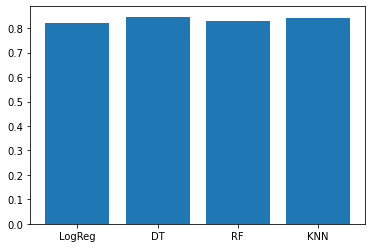

In [214]:
plt.bar(d.keys(),d.values())
plt.show()